## Lead Scoring Case Study

We need to create a model which is able to select the most promising leads from all acquire leads.

### Importing Libraries and Data

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
# Importing dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Data Cleaning and Preparation

In [4]:
# summing up the missing values (column-wise)
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [5]:
#Removing the column with more than 15% null values
leads = leads.drop('Prospect ID',axis = 1)
leads = leads.drop('Country',axis = 1)
leads = leads.drop('Specialization',axis = 1)
leads = leads.drop('How did you hear about X Education',axis = 1)
leads = leads.drop('What is your current occupation',axis = 1)
leads = leads.drop('What matters most to you in choosing a course',axis = 1)
leads = leads.drop('Magazine',axis = 1)
leads = leads.drop('Through Recommendations',axis = 1)
leads = leads.drop('Receive More Updates About Our Courses',axis = 1)
leads = leads.drop('Tags',axis = 1)
leads = leads.drop('Lead Quality',axis = 1)
leads = leads.drop('Update me on Supply Chain Content',axis = 1)
leads = leads.drop('Get updates on DM Content',axis = 1)
leads = leads.drop('Lead Profile',axis = 1)
leads = leads.drop('City',axis = 1)
leads = leads.drop('Asymmetrique Activity Index',axis = 1)
leads = leads.drop('Asymmetrique Profile Index',axis = 1)
leads = leads.drop('Asymmetrique Activity Score',axis = 1)
leads = leads.drop('Asymmetrique Profile Score',axis = 1)
leads = leads.drop('I agree to pay the amount through cheque',axis = 1)

In [6]:
#Removing the rows with null values
leads.dropna(axis = 0, inplace = True)

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Do Not Call                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Search                                    9074 non-null object
Newspaper Article                         9074 non-null object
X Education Forums                        9074 non-null object
Newspaper                                 9074 non-null object
Digital Adve

In [8]:
#Dealing with Outliers
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [9]:
# outlier treatment for Total Visits
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

In [10]:
# outlier treatment for Total Time Spent
Q1 = leads['Total Time Spent on Website'].quantile(0.25)
Q3 = leads['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

In [11]:
# outlier treatment for Page views per visit
Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [12]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8512.00000,8512.000000,8512.000000,8512.000000,8512.000000
mean,616994.68985,0.376645,2.820136,471.166471,2.083462
std,23301.45426,0.484573,2.434469,542.763712,1.652656
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596390.25000,0.000000,0.000000,0.000000,0.000000
50%,615440.50000,0.000000,3.000000,234.000000,2.000000
75%,637051.50000,1.000000,4.000000,894.000000,3.000000
max,660737.00000,1.000000,11.000000,2253.000000,6.000000


In [13]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Modified


In [14]:
# Converting Yes to 1 and No to 0
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [15]:
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,A free copy of Mastering The Interview
count,8512.00000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000,8512.0,8512.0,8512.000000,8512.000000,8512.000000
mean,616994.68985,0.076715,0.000235,0.376645,2.820136,471.166471,2.083462,0.000940,0.0,0.0,0.000117,0.000235,0.301809
std,23301.45426,0.266155,0.015328,0.484573,2.434469,542.763712,1.652656,0.030644,0.0,0.0,0.010839,0.015328,0.459070
min,579533.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,596390.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,615440.50000,0.000000,0.000000,0.000000,3.000000,234.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,637051.50000,0.000000,0.000000,1.000000,4.000000,894.000000,3.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000
max,660737.00000,1.000000,1.000000,1.000000,11.000000,2253.000000,6.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


In [16]:
#Removing the columns with same values or with very low variations
leads = leads.drop('Do Not Call', axis = 1)
leads = leads.drop('Search', axis = 1)
leads = leads.drop('Newspaper Article', axis = 1)
leads = leads.drop('Newspaper', axis = 1)
leads = leads.drop('X Education Forums', axis = 1)
leads = leads.drop('Digital Advertisement', axis = 1)

### Dummy Variable Creation

In [17]:
# Creating dummy variables for the variable 'Lead Origin'
lead_origin = pd.get_dummies(leads['Lead Origin'], prefix='Lead_Origin')
lead_origin_1 = lead_origin.drop(['Lead_Origin_Lead Import'], 1)
leads = pd.concat([leads,lead_origin_1], axis=1)

In [18]:
# Creating dummy variables for the variable 'Lead Source'
lead_source = pd.get_dummies(leads['Lead Source'], prefix='Lead_Source')
lead_source_1 = lead_source.drop(['Lead_Source_NC_EDM'], 1)
leads = pd.concat([leads,lead_source_1], axis=1)

In [19]:
# Creating dummy variables for the variable 'Last Activity'
last_activity = pd.get_dummies(leads['Last Activity'], prefix='Last_Activity')
last_activity_1 = last_activity.drop(['Last_Activity_Visited Booth in Tradeshow'], 1)
leads = pd.concat([leads,last_activity_1], axis=1)

In [20]:
# Creating dummy variables for the variable 'Last Notable Activity'
notable_activity = pd.get_dummies(leads['Last Notable Activity'], prefix='Notable_Activity')
notable_activity_1 = notable_activity.drop(['Notable_Activity_View in browser link Clicked'], 1)
leads= pd.concat([leads,notable_activity_1], axis=1)

### Dropping the repeated variables

In [21]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], 1)

In [22]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 0 to 9239
Data columns (total 61 columns):
Lead Number                                   8512 non-null int64
Do Not Email                                  8512 non-null int64
Converted                                     8512 non-null int64
TotalVisits                                   8512 non-null float64
Total Time Spent on Website                   8512 non-null int64
Page Views Per Visit                          8512 non-null float64
A free copy of Mastering The Interview        8512 non-null int64
Lead_Origin_API                               8512 non-null uint8
Lead_Origin_Landing Page Submission           8512 non-null uint8
Lead_Origin_Lead Add Form                     8512 non-null uint8
Lead_Source_Click2call                        8512 non-null uint8
Lead_Source_Direct Traffic                    8512 non-null uint8
Lead_Source_Facebook                          8512 non-null uint8
Lead_Source_Google             

Now we can see we have all variables as integer.

In [23]:
leads_1 = leads.drop('Lead Number', axis = 1)

## Model Building
Let's start by splitting our data into a training set and a test set.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Putting feature variable to X
X = leads_1.drop('Converted', axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Click2call,Lead_Source_Direct Traffic,...,Notable_Activity_Email Received,Notable_Activity_Form Submitted on Website,Notable_Activity_Had a Phone Conversation,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_Resubscribed to emails,Notable_Activity_SMS Sent,Notable_Activity_Unreachable,Notable_Activity_Unsubscribed
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
# Putting response variable to y
y = leads_1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting Data into Training and Test Sets

In [27]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [28]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Click2call,Lead_Source_Direct Traffic,...,Notable_Activity_Email Received,Notable_Activity_Form Submitted on Website,Notable_Activity_Had a Phone Conversation,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_Resubscribed to emails,Notable_Activity_SMS Sent,Notable_Activity_Unreachable,Notable_Activity_Unsubscribed
count,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,...,5958.0,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.0,5958.000000,5958.000000,5958.000000
mean,0.075361,2.821081,471.455018,2.082246,0.302450,0.399631,0.528365,0.068647,0.000504,0.275932,...,0.0,0.000168,0.001343,0.369084,0.020477,0.029204,0.0,0.235817,0.003693,0.004867
std,0.263995,2.430269,545.923205,1.655758,0.459358,0.489864,0.499237,0.252874,0.022436,0.447020,...,0.0,0.012955,0.036622,0.482597,0.141636,0.168393,0.0,0.424544,0.060659,0.069603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,3.000000,232.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,4.000000,898.750000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,11.000000,2253.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


### Feature Standardisation

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Click2call,Lead_Source_Direct Traffic,...,Notable_Activity_Email Received,Notable_Activity_Form Submitted on Website,Notable_Activity_Had a Phone Conversation,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_Resubscribed to emails,Notable_Activity_SMS Sent,Notable_Activity_Unreachable,Notable_Activity_Unsubscribed
6227,0,-1.160908,-0.863665,-1.257684,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6322,0,-0.749396,0.114577,-0.653680,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3644,0,1.308162,-0.838018,0.554327,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3011,0,0.896651,-0.445988,0.252325,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8267,0,-1.160908,-0.863665,-1.257684,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking the Leads Conversion Rate

In [31]:
### Checking the Leads Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.66447368421053

We have almost 37.66% leads conversion rate

### Running Your First Training Model

In [32]:
import statsmodels.api as sm

In [33]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5905
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 02 Mar 2019   Deviance:                          nan
Time:                        15:18:09   Pearson chi2:                 7.81e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       7.099e+15   8.46e+07   8.39e+07      0.000     7.1e+15     7.1e+15
Do Not Email                               -4.744e+14   4.89e+06   -9.7e+07      0.000   -4.74e+14   -4.74e+14
TotalVisits                                 3.855e+14   1.43e+06   2.69e+08      0.000    3.86e+14    3.86e+14
Total Time Spent on Website                 4.514e+13   1.01e+06   4.47e+07      0.000    4.51e+13    4.51e+13
Page Views Per Visit                       -1.684e+14    1.6e+06  -1.05e+08      0.000   -1.68e+14   -1.68e+14
A free copy of Mastering The Interview      8.964e+13    2.8e+06    3.2e+07      0.000    8.96e+13    8.96e+13
Lead_Origin_API                            -3.221e+15   6.89e+07  -4.67e+07      0.000   -3.22e+15   -3.22e+15
Lead_Origin_Landing Page Submission         -3.36e+15   6.89e+07  -4.88e+07      0.000   -3.36e+15   -3.36e+15
Lead_Origin_Lead Add Form                  -2.865e+15   8.36e+07  -3.43e+07      0.000   -2.86e+15   -2.86e+15
Lead_Source_Click2call                     -2.544e+15    9.1e+07   -2.8e+07      0.000   -2.54e+15   -2.54e+15
Lead_Source_Direct Traffic                 -4.585e+15   6.72e+07  -6.82e+07      0.000   -4.58e+15   -4.58e+15
Lead_Source_Facebook                       -9.432e+15    9.5e+07  -9.93e+07      0.000   -9.43e+15   -9.43e+15
Lead_Source_Google                         -4.656e+15   6.72e+07  -6.93e+07      0.000   -4.66e+15   -4.66e+15
Lead_Source_Live Chat                      -5.448e+14   1.06e+08  -5.13e+06      0.000   -5.45e+14   -5.45e+14
Lead_Source_Olark Chat                     -3.498e+15   6.73e+07   -5.2e+07      0.000    -3.5e+15    -3.5e+15
Lead_Source_Organic Search                 -4.605e+15   6.73e+07  -6.85e+07      0.000    -4.6e+15    -4.6e+15
Lead_Source_Pay per Click Ads               -8.13e+15    9.5e+07  -8.56e+07      0.000   -8.13e+15   -8.13e+15
Lead_Source_Press_Release                  -7.783e+15   9.53e+07  -8.17e+07      0.000   -7.78e+15   -7.78e+15
Lead_Source_Reference                       -4.06e+15   8.24e+07  -4.93e+07      0.000   -4.06e+15   -4.06e+15
Lead_Source_Referral Sites                 -4.781e+15   6.77e+07  -7.06e+07      0.000   -4.78e+15   -4.78e+15
Lead_Source_Social Media                   -3.371e+15   8.23e+07  -4.09e+07      0.000   -3.37e+15   -3.37e+15
Lead_Source_WeLearn                         9.036e+14    9.5e+07   9.52e+06      0.000    9.04e+14    9.04e+14
Lead_Source_Welingak Website                -3.31e+15   8.26e+07  -4.01e+07      0.000   -3.31e+15   -3.31e+15
Lead_Source_bing                           -3.939e+15   7.51e+07  -5.24e+07      0.000   -3.94e+15   -3.94e+15
Lead_Source_blog                           -8.207e+15    9.5e+07  -8.64e+07      0.000   -8.21e+15   -8.21e+15
Lead_Source_google                         -8.628e+15 

### Feature Selection Using RFE

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [36]:
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True])

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Source_Click2call', False, 17),
 ('Lead_Source_Direct Traffic', False, 19),
 ('Lead_Source_Facebook', False, 25),
 ('Lead_Source_Google', False, 21),
 ('Lead_Source_Live Chat', False, 37),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 20),
 ('Lead_Source_Pay per Click Ads', False, 32),
 ('Lead_Source_Press_Release', False, 39),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 13),
 ('Lead_Source_Social Media', False, 4),
 ('Lead_Source_WeLearn', False, 22),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_bing', False, 36),
 ('Lead_Source_blog', False, 18),
 ('Lead_Source_google', False, 16),
 ('Lead

In [38]:
col = X_train.columns[rfe.support_]

In [39]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead_Source_Click2call',
       'Lead_Source_Direct Traffic', 'Lead_Source_Facebook',
       'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Referral Sites',
       'Lead_Source_Social Media', 'Lead_Source_WeLearn', 'Lead_Source_bing',
       'Lead_Source_blog', 'Lead_Source_google', 'Lead_Source_testone',
       'Lead_Source_welearnblog_Home', 'Lead_Source_youtubechannel',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Marked Spam', 'Last_Activity_Email Opened',
       'Last_Activity_Email Received',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Page Visited on Website',
       'Last_Activity_Resubscribed to emails', 'Last_Activity_SMS Sent',
       'Last_Activity_Unreachable', 'Last_Activity_Un

### Checking the Correlation Matrix

In [40]:
X_train = X_train[col]

### Correlation Matrix

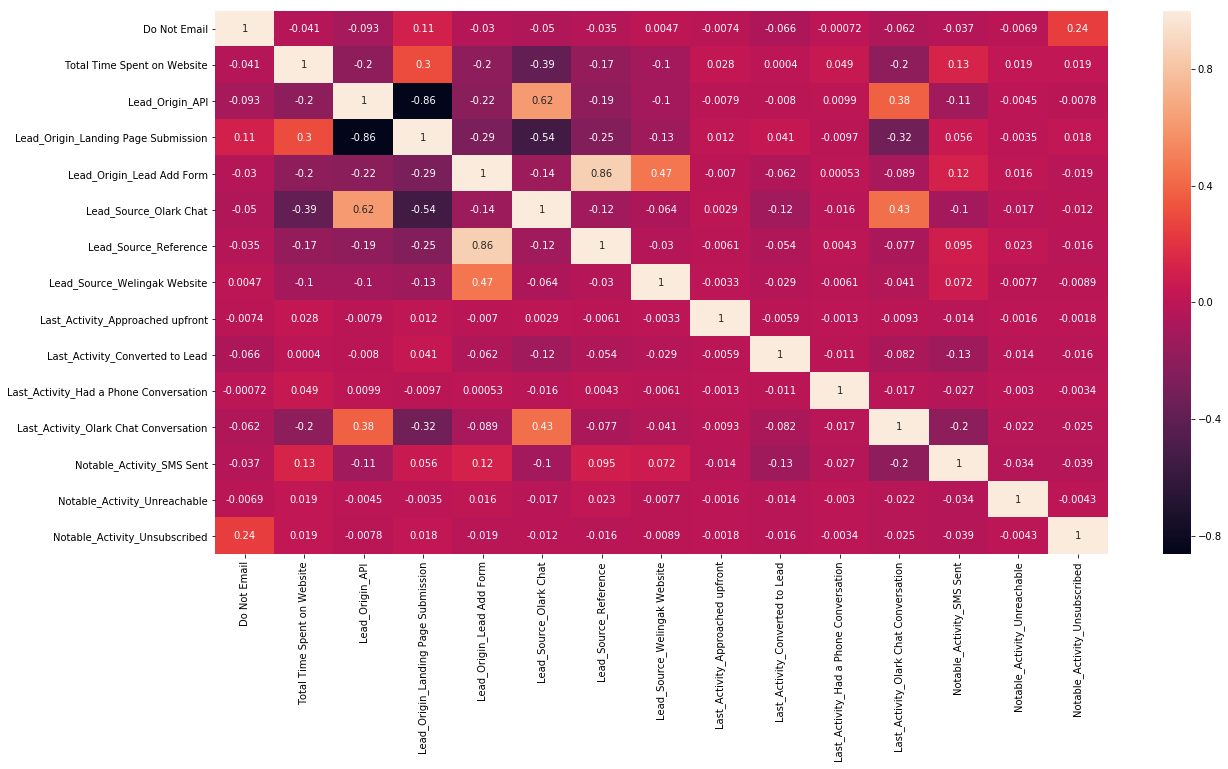

In [41]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

### Dropping highly correlated variables.

In [42]:
col = col.drop(["Lead_Origin_Landing Page Submission","Lead_Origin_Lead Add Form","Lead_Source_Olark Chat","Lead_Origin_API"])
X_train = X_train[col]

After dropping highly correlated variables now let's check the correlation matrix again.

### Re-Running the Model

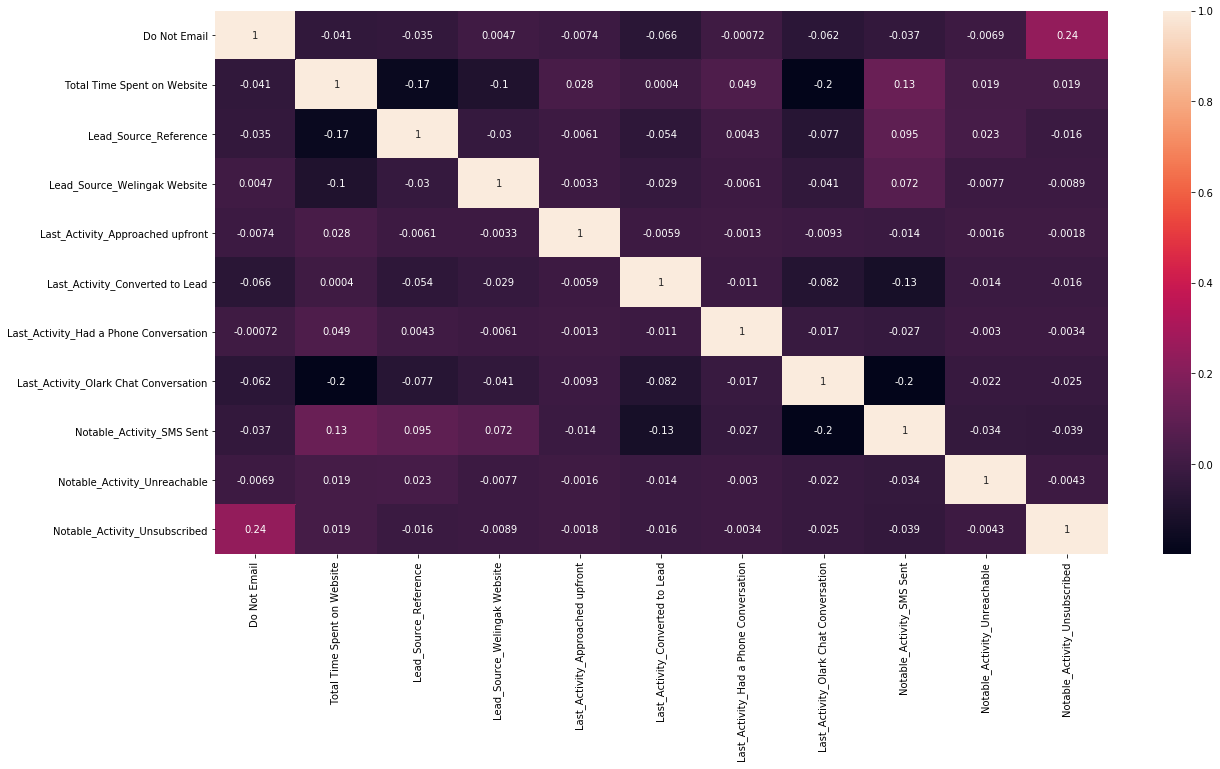

In [43]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)

In [44]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5946
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.0
Date:                Sat, 02 Mar 2019   Deviance:                       5428.0
Time:                        15:18:14   Pearson chi2:                 6.04e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9916      0.044    -22.465      0.000      -1.078      -0.905
Do Not Email                              -1.7762      0.181     -9.807      0.000      -2.131      -1.421
Total Time Spent on Website                0.8977      0.034     26.031      0.000       0.830       0.965
Lead_Source_Reference                      3.7837      0.220     17.196      0.000       3.352       4.215
Lead_Source_Welingak Website               6.0480      1.014      5.966      0.000       4.061       8.035
Last_Activity_Approached upfront          21.9532   1.29e+04      0.002      0.999   -2.52e+04    2.53e+04
Last_Activity_Converted to Lead           -1.2823      0.196     -6.554      0.000      -1.666      -0.899
Last_Activity_Had a Phone Conversation     3.2392      1.205      2.687      0.007       0.877       5.602
Last_Activity_Olark Chat Conversation     -1.1236      0.154     -7.277      0.000      -1.426      -0.821
Notable_Activity_SMS Sent                  1.5176      0.078     19.361      0.000       1.364       1.671
Notable_Activity_Unreachable               2.0225      0.577      3.503      0.000       0.891       3.154
Notable_Activity_Unsubscribed              1.5889      0.484      3.281      0.001       0.640       2.538
==========================================================================================================
"""

In [45]:
col = col.drop('Last_Activity_Approached upfront', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead_Source_Reference',
       'Lead_Source_Welingak Website', 'Last_Activity_Converted to Lead',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Notable_Activity_SMS Sent',
       'Notable_Activity_Unreachable', 'Notable_Activity_Unsubscribed'],
      dtype='object')

In [46]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5947
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.3
Date:                Sat, 02 Mar 2019   Deviance:                       5434.6
Time:                        15:18:14   Pearson chi2:                 6.04e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9882      0.044    -22.413      0.000      -1.075      -0.902
Do Not Email                              -1.7785      0.181     -9.821      0.000      -2.133      -1.424
Total Time Spent on Website                0.8984      0.034     26.074      0.000       0.831       0.966
Lead_Source_Reference                      3.7817      0.220     17.188      0.000       3.350       4.213
Lead_Source_Welingak Website               6.0467      1.014      5.964      0.000       4.060       8.034
Last_Activity_Converted to Lead           -1.2861      0.196     -6.574      0.000      -1.670      -0.903
Last_Activity_Had a Phone Conversation     3.2365      1.206      2.684      0.007       0.873       5.600
Last_Activity_Olark Chat Conversation     -1.1269      0.154     -7.298      0.000      -1.430      -0.824
Notable_Activity_SMS Sent                  1.5143      0.078     19.324      0.000       1.361       1.668
Notable_Activity_Unreachable               2.0193      0.578      3.497      0.000       0.887       3.151
Notable_Activity_Unsubscribed              1.5874      0.484      3.278      0.001       0.638       2.537
==========================================================================================================
"""

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.11
7,Notable_Activity_SMS Sent,1.10
0,Do Not Email,1.09
2,Lead_Source_Reference,1.08
9,Notable_Activity_Unsubscribed,1.07
6,Last_Activity_Olark Chat Conversation,1.04
3,Lead_Source_Welingak Website,1.03
4,Last_Activity_Converted to Lead,1.00
5,Last_Activity_Had a Phone Conversation,1.00
8,Notable_Activity_Unreachable,1.00


### Making Predictions

In [49]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6227    0.052603
6322    0.102356
3644    0.149183
3011    0.199594
8267    0.146282
1339    0.372111
211     0.810011
661     0.668833
2120    0.146282
475     0.882635
dtype: float64

In [50]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05260262, 0.10235602, 0.14918305, 0.19959415, 0.14628215,
       0.37211145, 0.81001119, 0.66883334, 0.14628215, 0.88263532])

In [51]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.052603,6227
1,0,0.102356,6322
2,0,0.149183,3644
3,0,0.199594,3011
4,1,0.146282,8267


In [52]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.052603,6227,0
1,0,0.102356,6322,0
2,0,0.149183,3644,0
3,0,0.199594,3011,0
4,1,0.146282,8267,0


### Model Evaluation

In [53]:
from sklearn import metrics

In [54]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3210  510]
 [ 836 1402]]


In [55]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7740852635112454


In [56]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [57]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6264521894548705

In [58]:
# Let us calculate specificity
TN / float(TN+FP)

0.8629032258064516

In [59]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

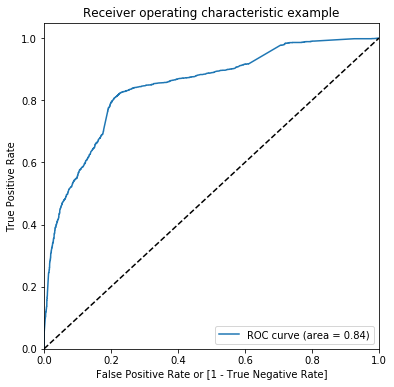

(array([0.        , 0.        , 0.        , ..., 0.99704301, 0.99731183,
        1.        ]),
 array([4.46827525e-04, 8.93655049e-04, 1.34048257e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([0.99818555, 0.99758538, 0.99719637, ..., 0.01146293, 0.00985217,
        0.00929068]))

In [60]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [61]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.052603,6227,0,1,0,0,0,0,0,0,0,0,0
1,0,0.102356,6322,0,1,1,0,0,0,0,0,0,0,0
2,0,0.149183,3644,0,1,1,0,0,0,0,0,0,0,0
3,0,0.199594,3011,0,1,1,0,0,0,0,0,0,0,0
4,1,0.146282,8267,0,1,1,0,0,0,0,0,0,0,0


In [62]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375629  1.000000  0.000000
0.1   0.1  0.541121  0.983914  0.274731
0.2   0.2  0.701746  0.869080  0.601075
0.3   0.3  0.791876  0.823503  0.772849
0.4   0.4  0.796408  0.785523  0.802957
0.5   0.5  0.774085  0.626452  0.862903
0.6   0.6  0.770393  0.519660  0.921237
0.7   0.7  0.757133  0.426720  0.955914
0.8   0.8  0.736489  0.343610  0.972849
0.9   0.9  0.677912  0.156836  0.991398


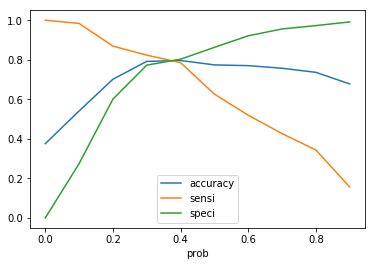

In [63]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.052603,6227,0,1,0,0,0,0,0,0,0,0,0
1,0,0.102356,6322,0,1,1,0,0,0,0,0,0,0,0
2,0,0.149183,3644,0,1,1,0,0,0,0,0,0,0,0
3,0,0.199594,3011,0,1,1,0,0,0,0,0,0,0,0
4,1,0.146282,8267,0,1,1,0,0,0,0,0,0,0,0


In [65]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2940  780]
 [ 432 1806]]


In [66]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.796576032225579


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.806970509383378

In [69]:
# Let us calculate specificity
TN / float(TN+FP)

0.7903225806451613

In [70]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [71]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Source_Reference,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Notable_Activity_SMS Sent,Notable_Activity_Unreachable,Notable_Activity_Unsubscribed
9058,0,-0.849009,0,0,0,0,0,0,0,0
5002,0,-0.180361,0,0,0,0,0,1,0,0
3472,0,-0.579718,0,0,0,0,0,0,0,0
6698,0,3.056630,0,0,0,0,0,1,0,0
6387,0,-0.233487,0,0,0,0,0,0,0,0


In [72]:
X_test_sm = sm.add_constant(X_test)

In [73]:
y_test_pred = res.predict(X_test_sm)

In [74]:
y_test_pred[:10]

9058    0.147934
5002    0.590039
3472    0.181091
6698    0.963461
6387    0.231844
6385    0.193873
5395    0.902369
4522    0.163501
6407    0.146282
4542    0.184286
dtype: float64

In [75]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [76]:
# Let's see the head
y_pred_1.head()

,0
9058,0.147934
5002,0.590039
3472,0.181091
6698,0.963461
6387,0.231844


In [77]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [78]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [79]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [80]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [81]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,9058,0.147934
1,0,5002,0.590039
2,0,3472,0.181091
3,1,6698,0.963461
4,0,6387,0.231844


In [82]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [83]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

In [84]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,9058,0,0.147934
1,5002,0,0.590039
2,3472,0,0.181091
3,6698,1,0.963461
4,6387,0,0.231844


In [85]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [86]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,9058,0,0.147934,0
1,5002,0,0.590039,1
2,3472,0,0.181091,0
3,6698,1,0.963461,1
4,6387,0,0.231844,0


In [87]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.803054032889585

In [88]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1268,  318],
       [ 185,  783]], dtype=int64)

In [89]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8088842975206612

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.7994955863808323